# SVM_NN_CNN_Lithological Mapping Using Satellite Data (ASTER, Landsat, Sentinel)

In [ ]:
# Some important and mostly-used packages are already installed on Google-Colab or
# You can run the on Jupiter or Spyder environment after installing required packages.
import numpy as np
import gdal
import matplotlib.pyplot as plt

In [ ]:
# Some other packages require installation.
# They can be accessed from Github; or installed using "pip".
!pip install rasterio

# After successful installation, import the package.
import rasterio as rio

In [ ]:
# Some packages are very large and you don't need to import the entire library.
# Just work with those methods that you'll work through your project.
from sklearn import svm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [ ]:
# Use rasterio package to open images.
# Data can be read from Google Drive directory.

# For ASTER
ASTER = rio.open('E:/My_Flash64/SVM_NN/ASTER_CNN/Input/AST15.tif')
ASTER_array = ASTER.read()

GT = rio.open('E:/My_Flash64/SVM_NN/ASTER_CNN/Input/GT15.tif')
GT_array = GT.read()

# For SENTINEL
# SENTINEL = rio.open('E:/My_Flash64/SVM_NN/Sentinel_CNN/Input/SEN10.tif)
# SENTINEL_array = SENTINEL.read()
# GT = rio.open('E:/My_Flash64/SVM_NN/Sentinel_CNN/Input/GT10.tif')
# GT_array = GT.read()

# For LANDSAT
# LANDSAT = rio.open('E:/My_Flash64/SVM_NN/landsat_CNN/Input/LAN30.tif)
# LANDSATL_array = LANDSAT.read()
# GT = rio.open('E:/My_Flash64/SVM_NN/landsat_CNN/Input/LGT30.tif)
# GT_array = GT.read()

# Then We should only change the names of 'ASTER' with 'SENTINEL' or with 'LANDSAT'

In [ ]:
ASTER_array.shape
GT.shape

(577, 513)

In [ ]:
# Let's see what these datasets look like.
print(ASTER_array.shape)
#print(SENTINEL_array.shape)
print(GT_array.shape)

(9, 577, 513)
(1, 577, 513)


In [ ]:
nRows = ASTER_array.shape[1]
nCols = ASTER_array.shape[2]
Bands = ASTER_array.shape[0]

In [ ]:
Bands

9

## Data Visualization

Visualization is the best way to become familiar with your dataset. Also, you can summarize the data by looking at some statistical features of the data.



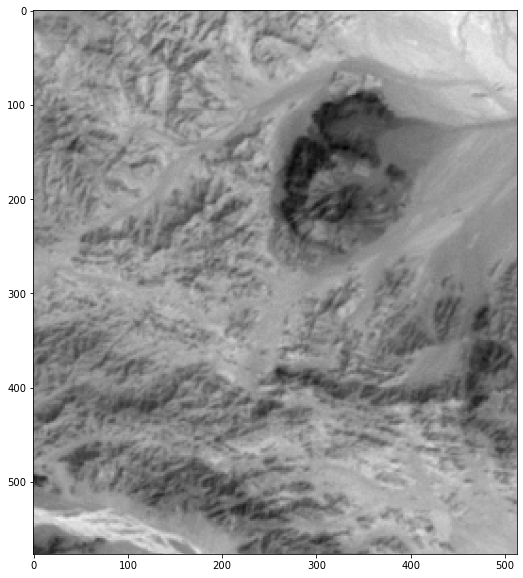

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(ASTER_array[5, :, :], cmap='gray')
plt.show()

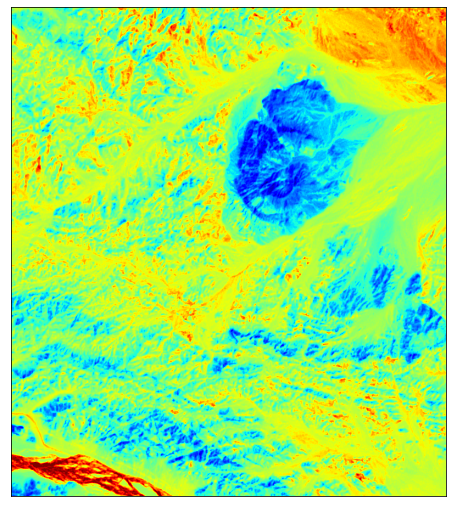

In [ ]:
# Visualizing DSM
plt.figure(figsize=(9, 9))
plt.imshow(ASTER_array[0, :, :], cmap='jet')
plt.xticks([])
plt.yticks([])
plt.show()

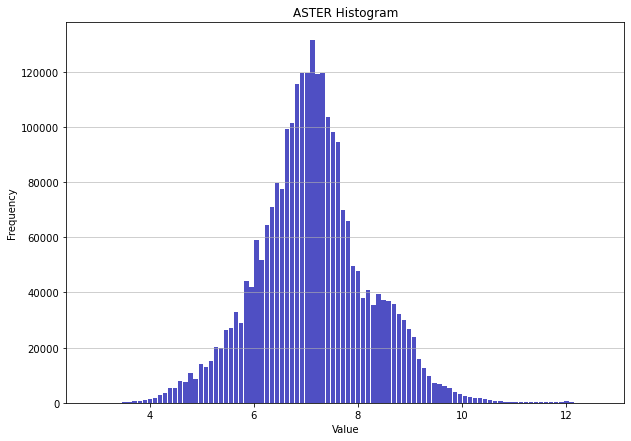

In [ ]:
# Let's look at it's histogram!
plt.figure(figsize=(10, 7))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('ASTER Histogram')
n, bins, patches = plt.hist(x=ASTER_array.flatten(), bins=100, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

In [ ]:
# Deal with outliers
#e.g. ASTER_array[ASTER_array > 60] = np.nan

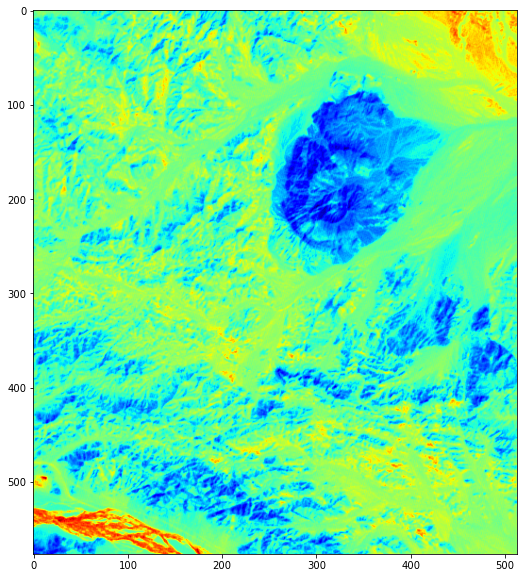

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(ASTER_array[2, :, :], cmap='jet')
plt.show()

In [ ]:
# Correct for incorrect values (outliers).
#ASTER_array[ASTER_array > 50] = np.nan

#plt.figure(figsize=(10, 7))
#plt.grid(axis='y', alpha=0.75)
#plt.xlabel('Value')
#plt.ylabel('Frequency')
#plt.title('ASTER Histogram')
#n, bins, patches = plt.hist(x=ASTER_array.flatten(), bins=100, color='r',alpha=0.7, rwidth=0.85)

In [ ]:
# Again, visualize the corrected data.
#plt.figure(figsize=(10, 7))
#plt.imshow(ASTER_array[0, :, :], cmap='jet')
#plt.xticks([])
#plt.yticks([])
#plt.show()

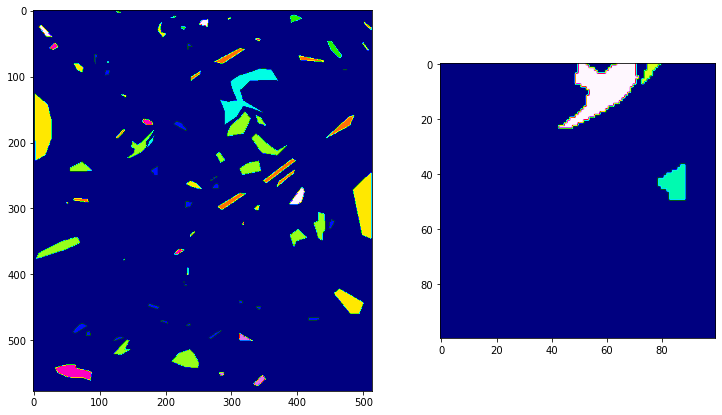

In [ ]:
# OK. What's next? Ground truth data
fig = plt.figure(figsize=(13, 7))
gs = fig.add_gridspec(1, 5)
fig.add_subplot(gs[0, :3]), plt.imshow(GT_array[0, :, :], cmap='gist_ncar')
fig.add_subplot(gs[0, -2:]), plt.imshow(GT_array[0, 200:300, 100:200], cmap='gist_ncar')
plt.show()

In [ ]:
list(np.unique(GT_array))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
# How many classes?
GT_array[GT_array == 255] = 0
classes = np.unique(GT_array)
print(classes)

[0 1 2 3 4 5 6 7 8 9]


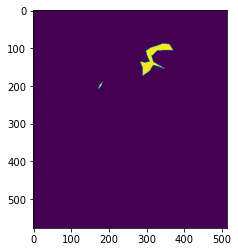

In [ ]:
c = 2
cls = np.zeros((nRows, nCols), dtype=int)
cls[GT_array[0, :, :] == c] = 1

plt.figure()
plt.imshow(cls)
plt.show()

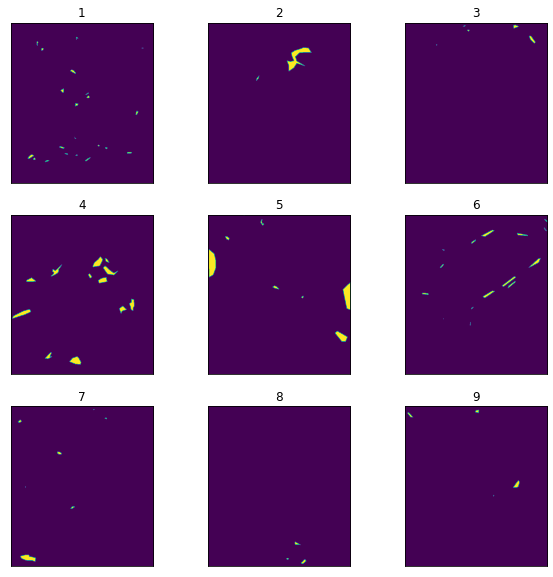

In [ ]:
# Take a look at individual classes.
plt.figure(figsize=(10, 10))
plt.tight_layout()
for i in range(len(classes)):
  if i < 1: 
    continue
  C = np.zeros((nRows, nCols))
  C[GT_array[0, :, :] == classes[i]] = 1
  plt.subplot(3, 3, i)
  plt.title(str(classes[i]))
  plt.xticks([])
  plt.yticks([])
  plt.imshow(C)
plt.show()

## Train/Test Split

In order to have completely different and unique train/test samples, we divide our ground truth data into two sets of train samples and test samples.

> You can also use [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function in scikit-learn.

In [ ]:
GT_array = GT_array[0, :, :].astype(int)
classes = np.unique(GT_array)
print(classes)

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
print(GT_array.shape)
print(GT_array.flatten().shape)
print(nRows * nCols)
print(GT_array.flatten()[1000])

(577, 513)
(296001,)
296001
0


In [ ]:
for i in range(20):
  if i in classes:
    print(len(np.where(GT_array.flatten() == i)[0]))

# print(len(np.where(GT_array.flatten() == 9)[0]))
# print(len(np.where(GT_array.flatten() == 2)[0]))
# print(len(np.where(GT_array.flatten() == 4)[0]))

278862
1018
2203
388
4991
4954
1803
1033
256
493


In [ ]:
def split_roi(gt_data, percent):
  import random

  Train = np.zeros_like(gt_data, dtype=int)
  Test = np.zeros_like(gt_data, dtype=int)
  
  labels = list(np.unique(gt_data))
  if 0 in labels: labels.remove(0) 

  for l in labels:
    ind = list(np.where(gt_data.flatten() == l)[0])

    random.shuffle(ind)
    train_inds = ind[:int(percent * len(ind))]
    test_inds = ind[int(percent * len(ind)):]

    temp = np.zeros((nRows*nCols, 1), dtype=int)
    temp[train_inds] = l
    temp = temp.reshape((nRows, nCols))
    Train = Train + temp
    
    temp = np.zeros((nRows*nCols, 1), dtype=int)
    temp[test_inds] = l
    temp = temp.reshape((nRows, nCols))
    Test = Test + temp

  return Train, Test

In [ ]:
Train, Test = split_roi(GT_array, 0.7)

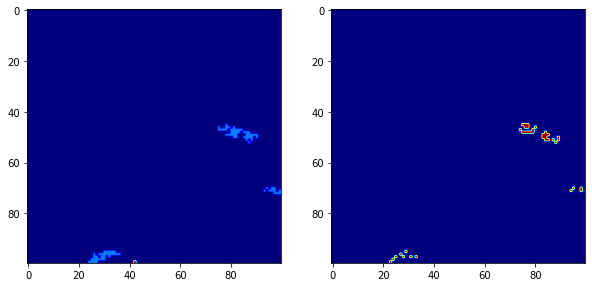

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(Train[400:500, 100:200], cmap='jet')
plt.subplot(122), plt.imshow(Test[400:500, 100:200], cmap='jet')
plt.show()

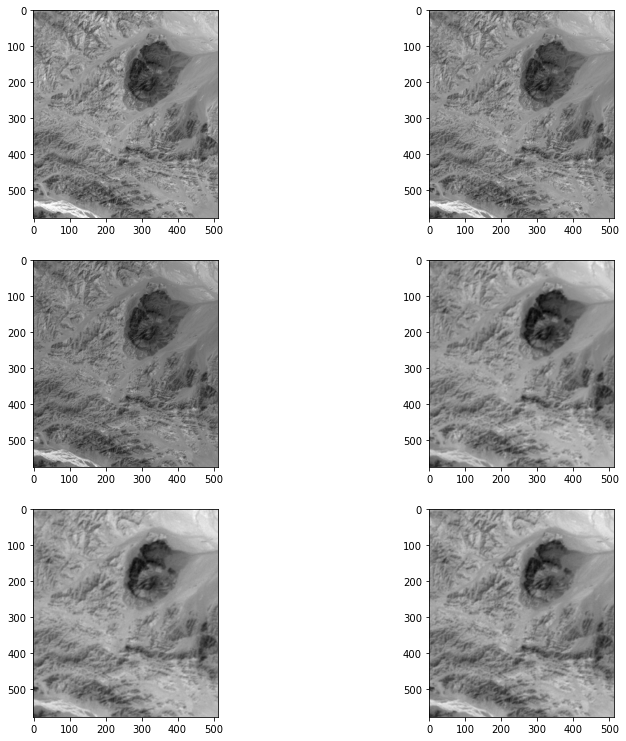

In [ ]:
# Just show a few bands
plt.figure(figsize=(13, 13))
plt.subplot(321), plt.imshow(ASTER_array[0, :, :], cmap='gray')
plt.subplot(322), plt.imshow(ASTER_array[1, :, :], cmap='gray')
plt.subplot(323), plt.imshow(ASTER_array[2, :, :], cmap='gray')
plt.subplot(324), plt.imshow(ASTER_array[3, :, :], cmap='gray')
plt.subplot(325), plt.imshow(ASTER_array[4, :, :], cmap='gray')
plt.subplot(326), plt.imshow(ASTER_array[5, :, :], cmap='gray')
plt.show()

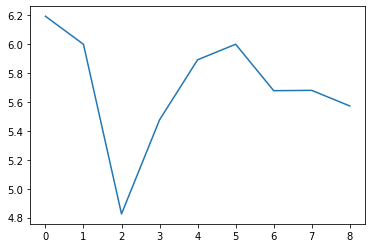

In [ ]:
# Also, we can see the spectral curve of a pixel.
plt.plot(ASTER_array[:, 200, 300])

In [ ]:
np.mean(ASTER_array[:, Train == c][:, :10], axis=1).shape

(9,)

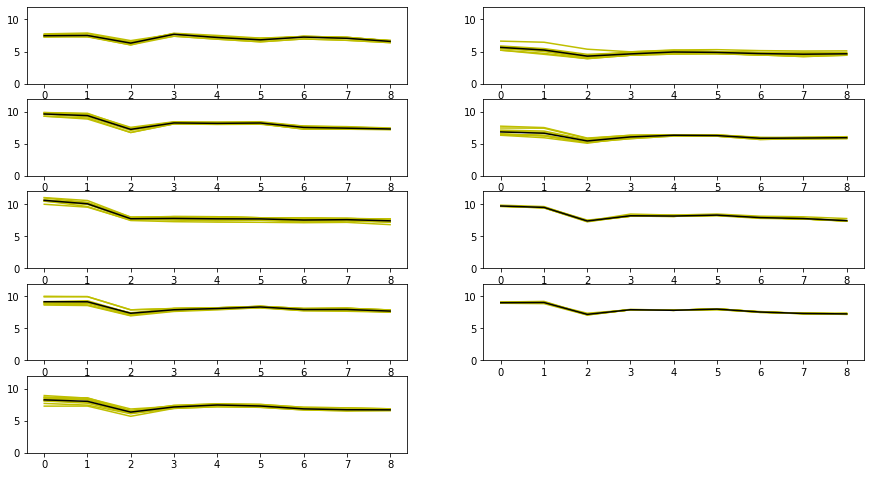

In [ ]:
# Let's try it for a class.
classes = [1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.figure(figsize=(15, 15))
for c in classes:
  plt.subplot(9, 2, classes.index(c)+1), plt.plot(ASTER_array[:, Train == c][:, :10], 'y')
  plt.plot(np.mean(ASTER_array[:, Train == c][:, :10], axis=1), 'k')
  plt.ylim([0, 12])
plt.show()

## Data Standardization

[Standardization](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling) of datasets is to make data look like Gaussian with **zero mean and unit variance**.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

> We are actually standardizing our datasets.

![picture](https://scikit-learn.org/stable/_images/sphx_glr_plot_all_scaling_002.png)

[Normalization](https://scikit-learn.org/stable/modules/preprocessing.html#normalization) is the process of scaling individual samples to have **unit norm**.




In [ ]:
ASTER_array.reshape(9, nRows * nCols).T.shape
# [ # observations (# samples / # pixels),  # features]

(296001, 9)

In [ ]:
# Prepare data for machine learning operation.
ASTER_data = ASTER_array.reshape(9, nRows * nCols).T
#SENTINEL_data = SENTINEL_array.reshape(13, nRows * nCols).T

Train_data = Train.reshape(1, nRows * nCols).T
Test_data = Test.reshape(1, nRows * nCols).T

print(ASTER_data.shape, Train_data.shape, Test_data.shape)

(296001, 9) (296001, 1) (296001, 1)


In [ ]:
# Standardizing data
scaler = StandardScaler()
ASTER_standard = scaler.fit(ASTER_data)
print(scaler.mean_, scaler.var_)
ASTER_standard = ASTER_standard.transform(ASTER_data)
scaler = StandardScaler()

[8.2384316  8.07752868 6.46012962 7.04323447 7.05992048 7.05513815
 6.8208841  6.77236329 6.62702145] [1.10113581 1.31659135 0.75927081 0.76898328 0.5866939  0.71091151
 0.61332389 0.64961335 0.52019714]


In [ ]:
# You can do the same operation mannually.
# ASTER_standard = np.zeros_like(ASTER_data, dtype=np.float)
# for i in range(48):
#   ASTER_standard[:, i] = (ASTER_data[:, i] - np.mean(ASTER_data[:, i])) / np.std(ASTER_data[:, i])

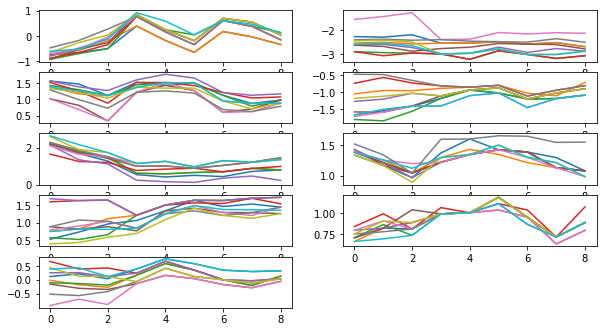

In [ ]:
# See how standardization works.
plt.figure(figsize=(10, 10))
for c in classes:
  plt.subplot(9, 2, classes.index(c)+1), plt.plot(ASTER_standard[Train.flatten() == c, :][:10, :].T)
plt.show()

# Classification-SVM

**Support vector machines (SVMs)** are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

* Effective in high dimensional spaces.

* Still effective in cases where number of dimensions is greater than the number of samples.

* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

> https://scikit-learn.org/stable/modules/svm.html


In [ ]:
# Extract train and test samples.
# (You can add other features) E.g features = np.hstack((ASTER_standard)), ASTER_pca[:, :3])) # ASTER_pca[:, :3] could be included
features = (ASTER_standard)
print(features.shape)

features = np.nan_to_num(features)

mask_train = np.zeros((nRows, nCols), dtype=int)
mask_test = np.zeros((nRows, nCols), dtype=int)

mask_train[Train != 0] = 1
mask_test[Test != 0] = 1

# plt.figure(), plt.imshow(mask_train, cmap='gray')
# plt.figure(), plt.imshow(mask_test, cmap='gray')

train_features = features[np.where(mask_train.flatten() == 1)[0]]
test_features = features[np.where(mask_test.flatten() == 1)[0]]

train_samples = Train_data[np.where(mask_train.flatten() == 1)[0]]
test_samples = Test_data[np.where(mask_test.flatten() == 1)[0]]

(296001, 9)


In [ ]:
print(train_features.shape, test_features.shape, train_samples.shape, test_samples.shape)

(11994, 9) (5145, 9) (11994, 1) (5145, 1)


In [ ]:
n = np.linspace(0, train_features.shape[0], num=11994, dtype=int)

In [ ]:
clf = svm.SVC(probability=False)
clf.fit(train_features[n[:-1]], train_samples[n[:-1]])

C:\Users\Elnaz\anaconda3\envs\am_keras_tf\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [ ]:
features = np.nan_to_num(features)
classification_map = clf.predict(features)
print(classification_map.shape)

classification_map = classification_map.reshape(nRows, nCols)
print(classification_map.shape)

(296001,)
(577, 513)


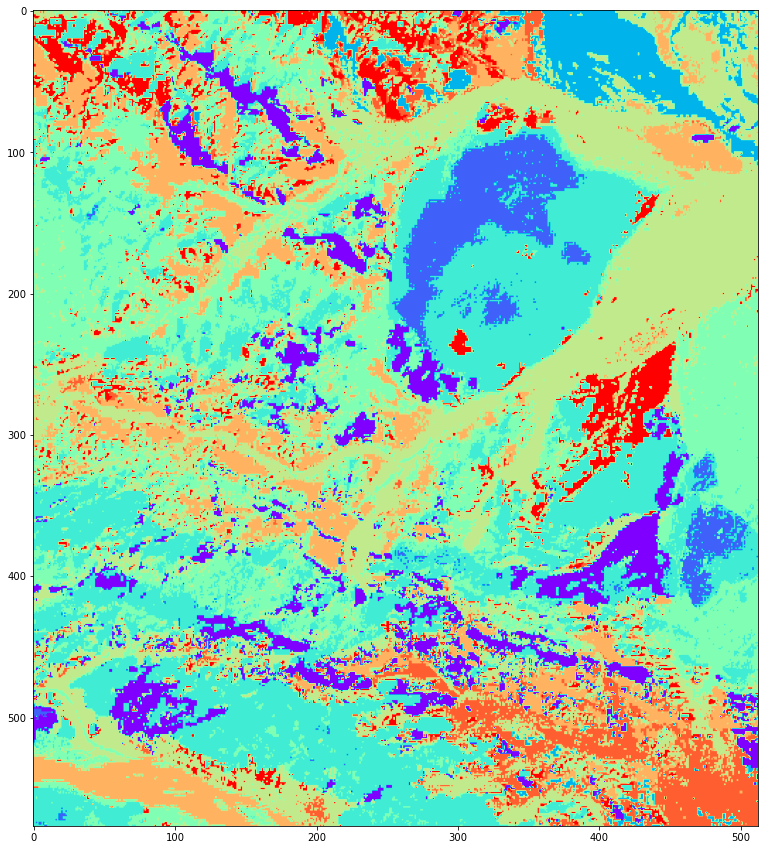

In [ ]:
# Total samples
plt.figure(figsize=(15, 15))
plt.imshow(classification_map, cmap='rainbow')
plt.show()

In [ ]:
# 1000 samples
#plt.figure(figsize=(15, 15))
#plt.imshow(classification_map, cmap='jet')
#plt.show()

# Classification-NN

In [ ]:
print(__doc__)

from sklearn.neural_network import MLPClassifier


Automatically created module for IPython interactive environment


In [ ]:
clf2 = MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=400,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
clf2.fit(train_features[n[:-1]], train_samples[n[:-1]])

C:\Users\Elnaz\anaconda3\envs\am_keras_tf\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPClassifier(alpha=0.1, hidden_layer_sizes=(15,), max_iter=400, random_state=1)

In [ ]:
features = np.nan_to_num(features)
classification_map2 = clf2.predict(features)
print(classification_map2.shape)

classification_map2 = classification_map2.reshape(nRows, nCols)
print(classification_map2.shape)

(296001,)
(577, 513)


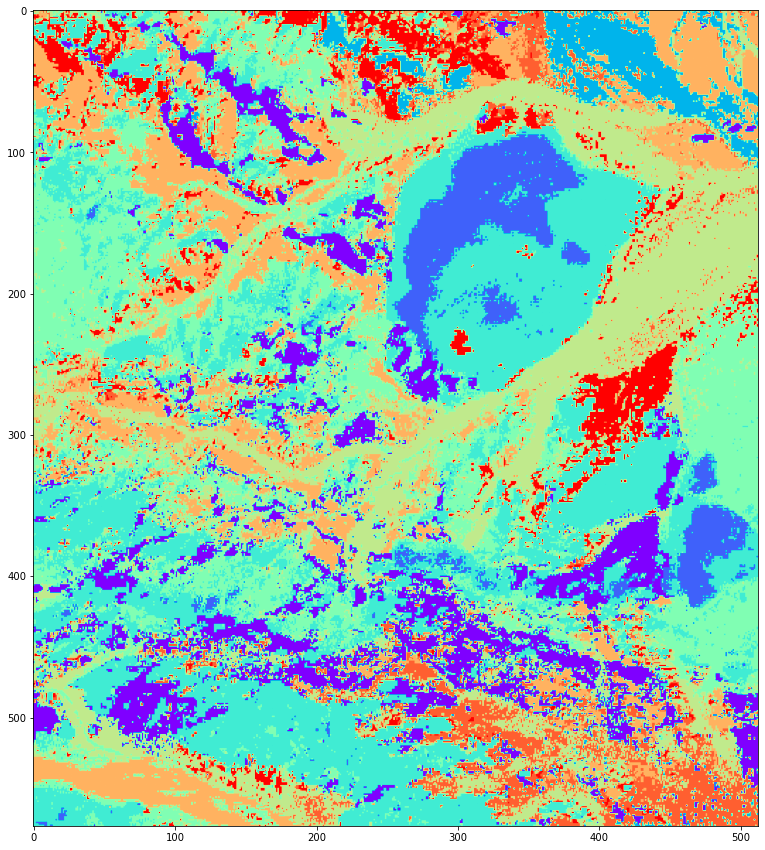

In [ ]:
# Total samples
plt.figure(figsize=(15, 15))
plt.imshow(classification_map2, cmap='rainbow')
plt.show()

# Classification-CNN

In [ ]:
# !pip install pyrsgis
import numpy as np
import random
# import sklearn
from pyrsgis import raster
from pyrsgis.ml import imageChipsFromArray

In [ ]:
# !pip install rasterio

# After successful installation, import the package.
import rasterio as rio

In [ ]:
#ASTER = rio.open('E:/My_Flash64/SVM_NN/ASTER_CNN/Input/AST15.tif')
#ASTER_array = ASTER.read()

#GT = rio.open('E:/My_Flash64/SVM_NN/ASTER_CNN/Input/GT15.tif')
#GT_array = GT.read()

In [ ]:
# Defining file names
featureFile = r'E:/My_Flash64/SVM_NN/ASTER_CNN/Input/AST15.tif'
labelFile = r'E:/My_Flash64/SVM_NN/ASTER_CNN/Input/GT15.tif'

In [ ]:
# Reading and normalizing input data
dsFeatures, arrFeatures = raster.read(featureFile, bands='all')
arrFeatures = arrFeatures.astype(float)

In [ ]:
for i in range(arrFeatures.shape[0]):
    bandMin = arrFeatures[i][:][:].min()
    bandMax = arrFeatures[i][:][:].max()
    bandRange = bandMax-bandMin
    for j in range(arrFeatures.shape[1]):
        for k in range(arrFeatures.shape[2]):
            arrFeatures[i][j][k] = (arrFeatures[i][j][k]-bandMin)/bandRange

In [ ]:
from copy import copy

In [ ]:
# Creating chips using pyrsgis
features = imageChipsFromArray(arrFeatures, x_size=7, y_size=7)

In [ ]:
# Reading and reshaping the label file
dsLabels, arrLabels = raster.read(labelFile)
arrLabels[arrLabels==255] = 0
arrLabels = arrLabels.flatten()

In [ ]:
# Separating and balancing the classes
features = features[arrLabels!=0]
labels = arrLabels[arrLabels!=0]

# Defining the function to split features and labels
def train_test_split(features, labels, trainProp=0.70):
    dataSize = features.shape[0]
    sliceIndex = int(dataSize*trainProp)
    randIndex = np.arange(dataSize)
    random.shuffle(randIndex)
    train_x = features[[randIndex[:sliceIndex]], :, :, :][0]
    test_x = features[[randIndex[sliceIndex:]], :, :, :][0]
    train_y = labels[randIndex[:sliceIndex]]
    test_y = labels[randIndex[sliceIndex:]]
    return(train_x, train_y, test_x, test_y)

In [ ]:
# Calling the function to split the data
train_x, train_y, test_x, test_y = train_test_split(features, labels)

In [ ]:
# Creating the model
# !pip install tensorflow
import tensorflow as tf

In [ ]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=1, padding='valid', activation='relu', input_shape=(train_x.shape[1], train_x.shape[2], train_x.shape[3])))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(48, kernel_size=1, padding='valid', activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 7, 7, 32)          320       
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 48)          1584      
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 48)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2352)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                150592    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0

In [ ]:
# Running the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=20)

Train on 11997 samples
Epoch 1/20
11997/11997 [==============================] - 13s 1ms/sample - loss: 1.0340 - accuracy: 0.6603
Epoch 2/20
11997/11997 [==============================] - 9s 743us/sample - loss: 0.4938 - accuracy: 0.8348
Epoch 3/20
11997/11997 [==============================] - 9s 748us/sample - loss: 0.3419 - accuracy: 0.8865
Epoch 4/20
11997/11997 [==============================] - 9s 753us/sample - loss: 0.2670 - accuracy: 0.9120
Epoch 5/20
11997/11997 [==============================] - 9s 756us/sample - loss: 0.2279 - accuracy: 0.9210
Epoch 6/20
11997/11997 [==============================] - 9s 751us/sample - loss: 0.2038 - accuracy: 0.9301
Epoch 7/20
11997/11997 [==============================] - 9s 760us/sample - loss: 0.1854 - accuracy: 0.9381
Epoch 8/20
11997/11997 [==============================] - 9s 767us/sample - loss: 0.1665 - accuracy: 0.9422
Epoch 9/20
11997/11997 [==============================] - 9s 762us/sample - loss: 0.1552 - accuracy: 0.9457
Epoch 

In [ ]:
# Loading and normalizing a new multispectral image
dsPre, featuresPre = raster.read(r'E:/My_Flash64/SVM_NN/ASTER_CNN/Input/AST15.tif')
featuresPre = featuresPre.astype(float)

for i in range(featuresPre.shape[0]):
    bandMinPre = featuresPre[i][:][:].min()
    bandMaxPre = featuresPre[i][:][:].max()
    bandRangePre = bandMaxPre-bandMinPre
    for j in range(featuresPre.shape[1]):
        for k in range(featuresPre.shape[2]):
            featuresPre[i][j][k] = (featuresPre[i][j][k]-bandMinPre)/bandRangePre

In [ ]:
# Generating image chips from the array
new_features = imageChipsFromArray(featuresPre, x_size=7, y_size=7)

In [ ]:
# Predicting new data and exporting the probability raster
newPredicted = model.predict(new_features)

In [ ]:
prediction = np.reshape(newPredicted.argmax(axis=1), (dsPre.RasterYSize, dsPre.RasterXSize))

In [ ]:
outFile = r'E:/My_Flash64/SVM_NN/Test/CNNAST15.tif'
raster.export(prediction, dsPre, filename=outFile, dtype='float')

In [ ]:
cnn_map = prediction
print(cnn_map.shape)


(577, 513)


ERROR! Session/line number was not unique in database. History logging moved to new session 246


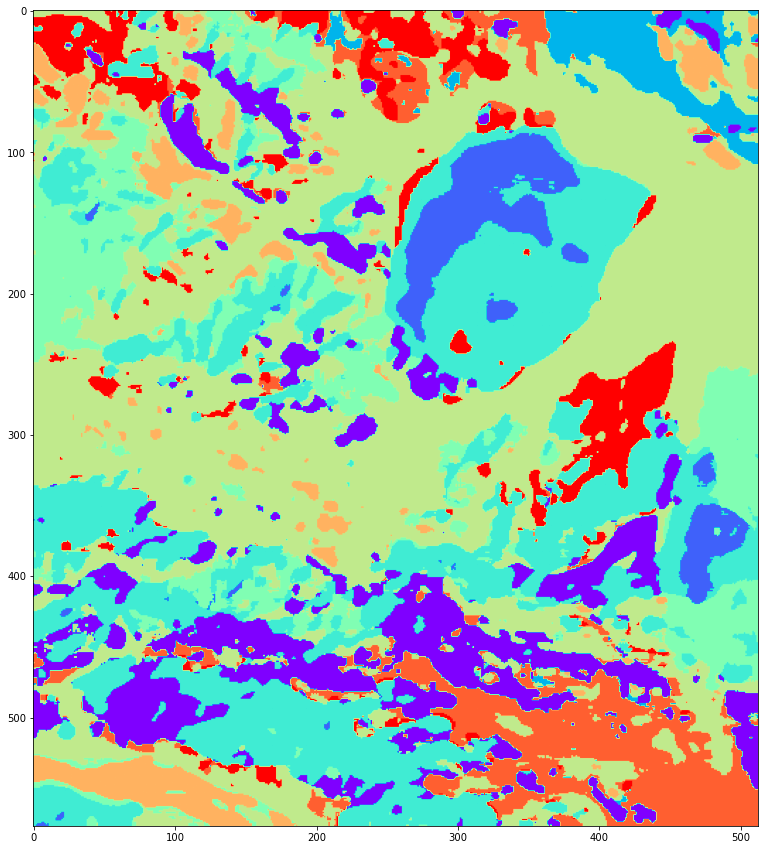

In [ ]:
# Total samples
plt.figure(figsize=(15, 15))
plt.imshow(cnn_map, cmap='rainbow')
plt.show()

# CM-SVM-Accuracy Assessment

In [ ]:
#from sklearn.metrics import plot_confusion_matrix

#plot_confusion_matrix(clf, test_features, test_samples, cmap=plt.cm.Blues, normalize='true')


#from sklearn.metrics import precision_recall_fscore_support
#y_pred = clf.predict(test_features)
#precision_recall_fscore_support(test_samples, y_pred, average='weighted')

# CM-NN-Accuracy Assessment

In [ ]:
#from sklearn.metrics import plot_confusion_matrix

#plot_confusion_matrix(clf2, test_features, test_samples, cmap=plt.cm.Blues, normalize='true')


#from sklearn.metrics import precision_recall_fscore_support
#y_pred = clf2.predict(test_features)
#precision_recall_fscore_support(test_samples, y_pred, average='weighted')

# CM-CNN-Accuracy Assessment

In [ ]:
# Predicting for test data 
#from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
#yTestPredicted = model.predict(test_x)
#y_score = yTestPredicted[:, 1:yTestPredicted.shape[1]]

In [ ]:
# Predicting for test data 
#from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
#yTestPredicted = model.predict(test_x)
#y_score = yTestPredicted[:, 1:yTestPredicted.shape[1]]

In [ ]:
# Calculating and displaying error metrics
#yTestPredicted = (yTestPredicted>0.5).astype(int)

#cMatrix = confusion_matrix(test_y, yTestPredicted.argmax(axis=1))
#pScore = precision_score(test_y, yTestPredicted.argmax(axis=1), average='micro')
#rScore = recall_score(test_y, yTestPredicted.argmax(axis=1), average='micro')
#fscore = f1_score(test_y, yTestPredicted.argmax(axis=1), average='micro')

#print("Confusion matrix:\n", cMatrix)
#print("\nP-Score: %.3f, R-Score: %.3f, F-Score: %.3f" % (pScore, rScore, fscore))


# ROC - SVM - Accuracy Assessment

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

Automatically created module for IPython interactive environment


In [ ]:
#X_train = train_features
#X_test = test_features
#y_train = train_samples
#y_test = test_samples
#n_classes = classes

In [ ]:
X = ASTER_standard
y = GT_array.flatten()
print (X.shape)
print (y.shape)

(296001, 9)
(296001,)


In [ ]:
# Binarize the output
y = label_binarize(y, classes=[1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y.shape[1]

In [ ]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(probability=False))
y_score = classifier.fit(X_train[n[:-1]], y_train[n[:-1]]).decision_function(X_test)


In [ ]:

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

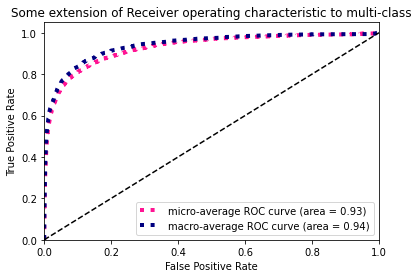

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

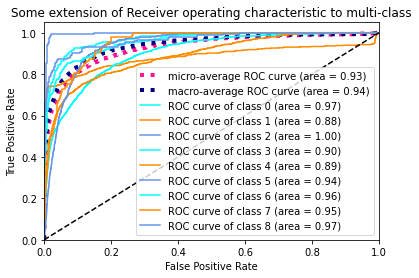

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# ROC - NN - Accuracy Assessment

In [ ]:
# Binarize the output
#y = label_binarize(y, classes=[1, 2, 3, 4, 5, 6, 7, 8, 9])
#n_classes = y.shape[1]

In [ ]:
# shuffle and split training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=0)

# Learn to predict each class against the other
classifier2 = OneVsRestClassifier(MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=400,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False))
y_score2 = classifier2.fit(X_train[n[:-1]], y_train[n[:-1]]).predict_proba(X_test)


In [ ]:
#classifier2 = OneVsRestClassifier(MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
#y_score2 = classifier2.fit(X_train, y_train).score(X_test, y_test)
#classifier2.predict_proba(X_test)
#classifier2.predict(X_test)
#y_score2 = classifier2.score(X_test, y_test)
# Learn to predict each class against the other
#classifier2 = OneVsRestClassifier(MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1))
#y_score2 = classifier2.fit(X_train, y_train).predict_proba(X_test)

In [ ]:

# Compute ROC curve and ROC area for each class
fpr2 = dict()
tpr2 = dict()
roc_auc = dict()
for i in range(n_classes):
    #fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score2[:, i])
    fpr2[i], tpr2[i], _ = roc_curve(y_test[:, i], classifier2.predict_proba(X_test)[:,i])
    roc_auc[i] = auc(fpr2[i], tpr2[i])

# Compute micro-average ROC curve and ROC area
fpr2["micro"], tpr2["micro"], _ = roc_curve(y_test.ravel(), y_score2.ravel())
roc_auc["micro"] = auc(fpr2["micro"], tpr2["micro"])

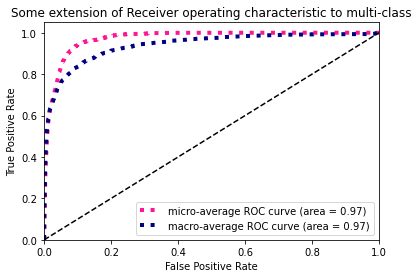

In [ ]:
# First aggregate all false positive rates
all_fpr2 = np.unique(np.concatenate([fpr2[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr2 = np.zeros_like(all_fpr2)
for i in range(n_classes):
    mean_tpr2 += interp(all_fpr2, fpr2[i], tpr2[i])

# Finally average it and compute AUC
mean_tpr2 /= n_classes

fpr2["macro"] = all_fpr2
tpr2["macro"] = mean_tpr2
roc_auc["macro"] = auc(fpr2["macro"], tpr2["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr2["micro"], tpr2["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

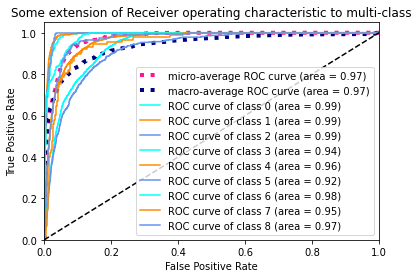

In [ ]:
# First aggregate all false positive rates
all_fpr2 = np.unique(np.concatenate([fpr2[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr2 = np.zeros_like(all_fpr2)
for i in range(n_classes):
    mean_tpr2 += interp(all_fpr2, fpr2[i], tpr2[i])

# Finally average it and compute AUC
mean_tpr2 /= n_classes

fpr2["macro"] = all_fpr2
tpr2["macro"] = mean_tpr2
roc_auc["macro"] = auc(fpr2["macro"], tpr2["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr2["micro"], tpr2["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr2[i], tpr2[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# ROC - CNN - Accuracy Assessment

In [ ]:
# ROC curve
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

In [ ]:
yTestPredicted = model.predict(test_x)
y_score = yTestPredicted[:, 1:yTestPredicted.shape[1]]

In [ ]:
# Computing ROC parameters for each class
n_classes = 9
fpr = dict()
tpr = dict()
roc_auc = dict()

In [ ]:
from sklearn.preprocessing import label_binarize
test_y = label_binarize(test_y, classes=list(range(1, n_classes+1)))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
# Computing micro-average ROC parameters
fpr['micro'], tpr['micro'], _ = roc_curve(test_y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
# Computing macro-average ROC parameters
# First aggregating all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [ ]:
# Then interpolating all ROC curves at the points obtained from the line above
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])


In [ ]:
# Finally averaging and computing AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

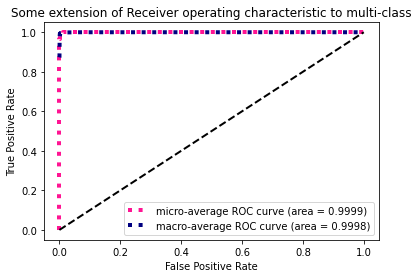

In [ ]:
# Plotting
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


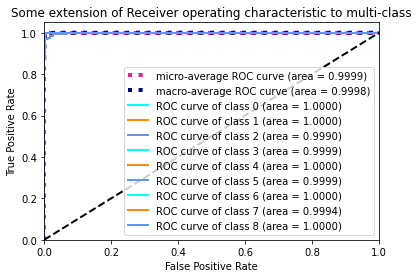

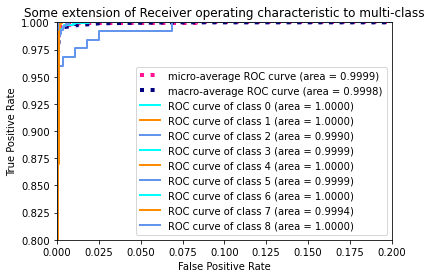

In [ ]:
# Plotting
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
